# Time Series Classification Experiments

Placeholder.

<img src="./images/TSC.png" width="600" alt="time series classification"> [<i>&#x200B;</i>](./images/TSC.png)

In [36]:
import numpy as np
from aeon.benchmarking import get_estimator_results, plot_critical_difference
from aeon.classification import DummyClassifier
from aeon.datasets import load_classification
from sklearn.metrics import accuracy_score

In [37]:
clf = DummyClassifier()
datasets = ["ArrowHead", "GunPoint", "ItalyPowerDemand", "Chinatown", "BeetleFly"]

# find accuracy for each of our datasets on our estimator
results = {}
for d in datasets:
    train_X, train_y = load_classification(d, split="train")
    test_X, test_y = load_classification(d, split="test")
    clf = clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    results[d] = accuracy_score(test_y, y_pred)

results

{'ArrowHead': 0.3942857142857143,
 'GunPoint': 0.49333333333333335,
 'ItalyPowerDemand': 0.49854227405247814,
 'Chinatown': 0.27405247813411077,
 'BeetleFly': 0.5}

In [38]:
benchmarks = ["STC", "DrCIF", "HC2"]
res = get_estimator_results(
    datasets=datasets, estimators=benchmarks, task="classification", type="accuracy"
)
res

{'STC': {'ArrowHead': 0.6914285714285714,
  'GunPoint': 1.0,
  'ItalyPowerDemand': 0.9543245869776482,
  'Chinatown': 0.9708454810495628,
  'BeetleFly': 0.95},
 'DrCIF': {'ArrowHead': 0.84,
  'GunPoint': 0.9933333333333332,
  'ItalyPowerDemand': 0.9689018464528668,
  'Chinatown': 0.9854227405247812,
  'BeetleFly': 0.9},
 'HC2': {'ArrowHead': 0.8742857142857143,
  'GunPoint': 1.0,
  'ItalyPowerDemand': 0.9698736637512148,
  'Chinatown': 0.9825072886297376,
  'BeetleFly': 0.95}}

In [39]:
import pandas as pd

res["Dummy"] = results

table = pd.DataFrame(res)
table

,STC,DrCIF,HC2,Dummy
ArrowHead,0.691429,0.840000,0.874286,0.394286
GunPoint,1.000000,0.993333,1.000000,0.493333
ItalyPowerDemand,0.954325,0.968902,0.969874,0.498542
Chinatown,0.970845,0.985423,0.982507,0.274052
BeetleFly,0.950000,0.900000,0.950000,0.500000


D:\CMP_Machine_Learning\Repositories\tsml-eval\venv\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
D:\CMP_Machine_Learning\Repositories\tsml-eval\venv\lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Matthew Middlehurst\AppData\Local\Temp\ipykernel_22600\982613135.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


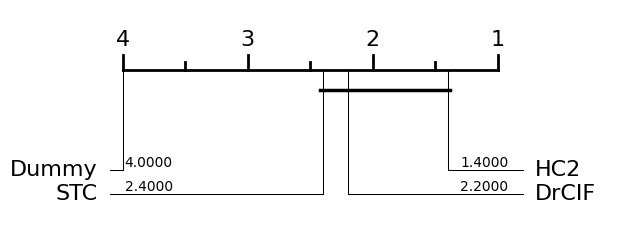

In [40]:
plt = plot_critical_difference(np.array(table), list(table.columns))
plt.show()